In [1]:
using PerlaTonettiWaugh, Parameters, Plots, DataFrames, Optim, LaTeXStrings

In [2]:
params_minimal = parameter_defaults(γ = 1)
settings = settings_defaults();

In [3]:
function constrained_equilibrium(ζ_p, params)
    params_constrained = merge(params, (ζ_p = ζ_p, ζ = params.ζ))
    CE_constrained = stationary_algebraic(params_constrained, settings) # competitive equilibrium
end

constrained_equilibrium (generic function with 1 method)

### Experiment 1: (Constrained) Planner's changing ζ_p and χ_p = χ

In [4]:
params_minimal = parameter_defaults(γ = 1)
d_baseline = params_minimal.d_0
params_baseline = merge(params_minimal, (d = d_baseline,));

ζ_p_range = params_baseline.ζ-0.1:0.005:params_baseline.ζ+1.0
d = DataFrame()
for ζ_p in ζ_p_range
    params_constrained = merge(params_baseline, (ζ_p = ζ_p, ζ = params_baseline.ζ))
    CE_constrained = stationary_algebraic(params_constrained, settings) # competitive equilibrium
    push!(d, CE_constrained)
end

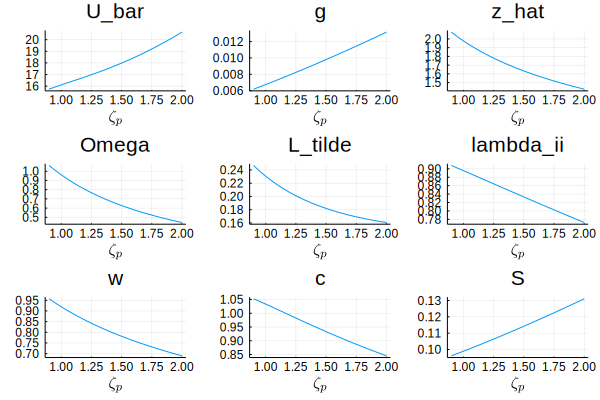

In [5]:
plot(ζ_p_range, [d.U_bar d.g d.z_hat d.Ω d.L_tilde d.λ_ii d.w d.c d.S],
    layout=9,
    title = ["U_bar" "g" "z_hat" "Omega" "L_tilde" "lambda_ii" "w" "c" "S"], xlabel = L"\zeta_p", legend = false)

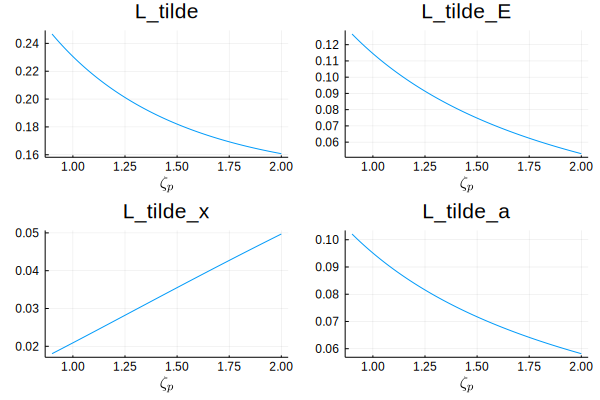

In [6]:
plot(ζ_p_range, [d.L_tilde d.L_tilde_E d.L_tilde_x d.L_tilde_a], layout=4,
    title = ["L_tilde" "L_tilde_E" "L_tilde_x" "L_tilde_a"], xlabel = L"\zeta_p", legend = false)

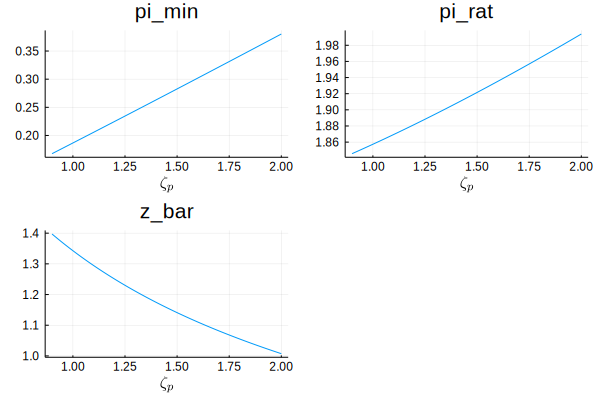

In [7]:
plot(ζ_p_range, [d.π_min d.π_rat d.z_bar], layout=3,
    title = ["pi_min" "pi_rat" "z_bar"], xlabel = L"\zeta_p", legend = false)

### Experiment 1: (Constrained) Planner's  ζ_p and compensating χ_p

In [8]:
params_minimal = parameter_defaults(γ = 1)
d_baseline = params_minimal.d_0
params_baseline = merge(params_minimal, (d = d_baseline,));

ζ_p_range = params_baseline.ζ-0.05:0.005:params_baseline.ζ+0.05
d = DataFrame()
for ζ_p in ζ_p_range
    χ = params_baseline.χ
    ζ = params_baseline.ζ
    χ_p = ζ_p*χ/(ζ - ζ * χ + ζ_p*χ)
    params_constrained = merge(params_baseline, (ζ_p = ζ_p, ζ = ζ, χ_p = χ_p))
    CE_constrained = stationary_algebraic(params_constrained, settings) # competitive equilibrium
    push!(d, CE_constrained)
end

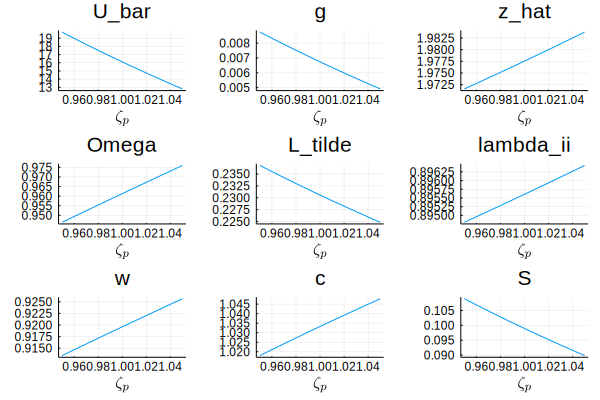

In [9]:
plot(ζ_p_range, [d.U_bar d.g d.z_hat d.Ω d.L_tilde d.λ_ii d.w d.c d.S],
    layout=9,
    title = ["U_bar" "g" "z_hat" "Omega" "L_tilde" "lambda_ii" "w" "c" "S"], xlabel = L"\zeta_p", legend = false)

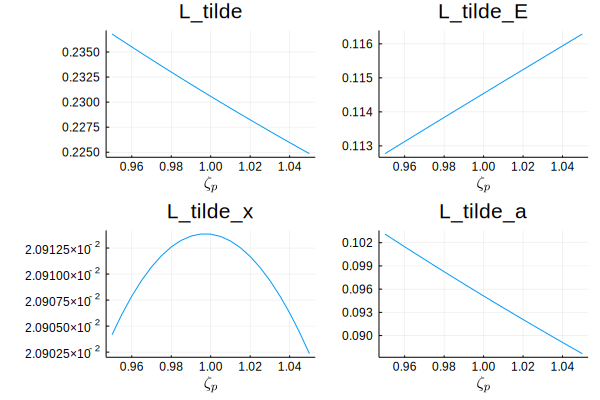

In [10]:
plot(ζ_p_range, [d.L_tilde d.L_tilde_E d.L_tilde_x d.L_tilde_a], layout=4,
    title = ["L_tilde" "L_tilde_E" "L_tilde_x" "L_tilde_a"], xlabel = L"\zeta_p", legend = false)

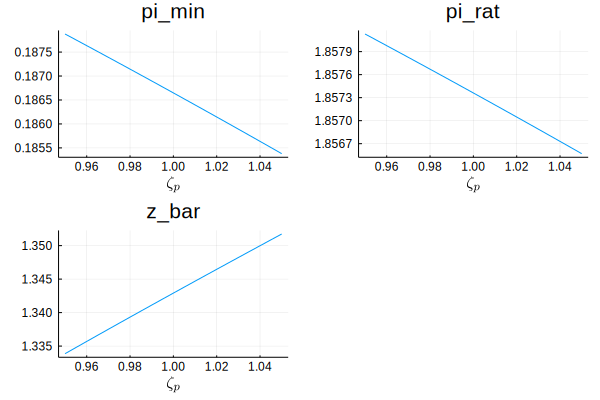

In [11]:
plot(ζ_p_range, [d.π_min d.π_rat d.z_bar], layout=3,
    title = ["pi_min" "pi_rat" "z_bar"], xlabel = L"\zeta_p", legend = false)